In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt

In [2]:
def show_images(image,image2):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(image2)
    plt.show()

In [3]:
def smaller(image, max_width, max_height):
    height, width, channels = image.shape
    if width >height:
        new_width = max_width
        new_height = int(height * (new_width / width))
    else:
        new_height = max_height
        new_width = int(width * (new_height / height))
    
    resized_img = cv2.resize(image, dsize=(new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return resized_img

In [4]:
def bigger(image, max_width, max_height):
    height, width, channels = image.shape
    if width >height:
        new_width = max_width
        new_height = int(height * (new_width / width))
    else:
        new_height = max_height
        new_width = int(width * (new_height / height))
    
    resized_img = cv2.resize(image, dsize=(new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return resized_img

In [5]:
path = "D:/SkinCancerDatasets/FinalDataset/images/melanoma/"
files = os.listdir(path)
max_width = 1080
max_height = 1080

image = cv2.imread(path + files[152])
height, width, channels = image.shape
print(image.shape)

if width > max_width or height > max_height:
    resized_img = smaller(image, max_width, max_height)
else:
    resized_img = bigger(image, max_width, max_height)

print(resized_img.shape)

(1280, 960, 3)
(1080, 810, 3)


In [6]:
height, width, channels = resized_img.shape
if width < max_width:
    x_sup = np.zeros((height,int((max_width-width)/2),channels),dtype=np.uint8)
    x_sup = resized_img[0:height,0:int((max_width-width)/2)]
    x_sup = np.flip(x_sup,axis=1)

    x_inf = np.zeros((height,int((max_width-width)/2),channels),dtype=np.uint8)
    x_inf = resized_img[0:height,width-int((max_width-width)/2):width]
    x_inf = np.flip(x_inf,axis=1)

    resized_img = np.concatenate((x_sup,resized_img),axis=1)
    resized_img = np.concatenate((resized_img,x_inf),axis=1)

if height < max_height:
    x_sup = np.zeros((int((max_height-height)/2),max_width,channels),dtype=np.uint8)
    x_sup = resized_img[0:int((max_height-height)/2),0:width]
    x_sup = np.flip(x_sup,axis=0)

    x_inf = np.zeros((int((max_height-height)/2),max_width,channels),dtype=np.uint8)
    x_inf = resized_img[height-int((max_height-height)/2):height,0:width]
    x_inf = np.flip(x_inf,axis=0)
    
    resized_img = np.concatenate((x_sup,resized_img),axis=0)
    resized_img = np.concatenate((resized_img,x_inf),axis=0)

cv2.imwrite("image.png",resized_img)

True

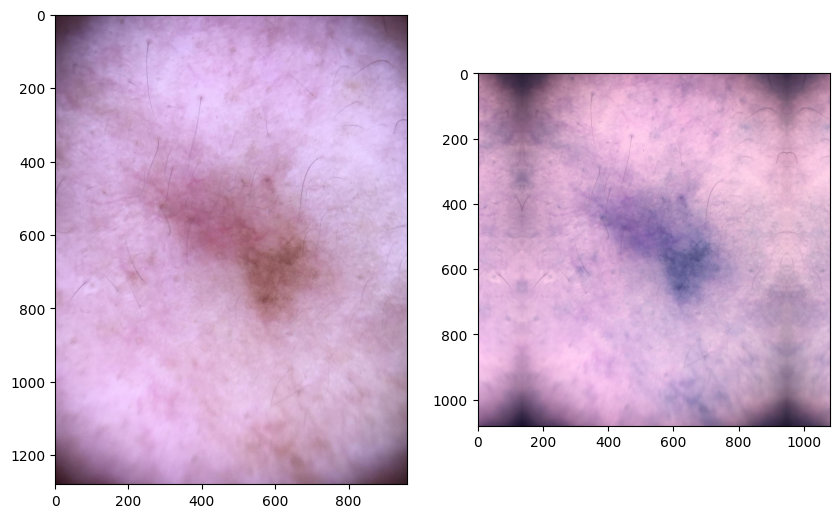

In [7]:
show_images(image,resized_img)